<a href="https://colab.research.google.com/github/garestrear/introduccion_ML_cursoUN/blob/main/Sesion9_10-Series_de_tiempo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de tiempo 

Para efectos prácticos podemos considerar una serie de tiempo como una colección de datos etiquetados (u ordenados) mediante una variable temporal. En este *Notebook* mostraremos como usar Python para analizar series de tiempo. En principio veremos las herramientas básicas que ofrece la librería `pandas` para manipular y analizar series de tiempo. Importaremos las librerías que usaremos en esta primera parte del curso:
- `numpy`: permite usar distintas herramientas de cálculo y simulaciones aleatorias
- `pandas`: Es una librería popular para manipular datos tabulares. 
- `matplotlib.pyplot`: Es la librería usada para graficar.
- `seaborn`: personalizar ciertos gráficos, de alguna forma complementa la librería anterior. 

Para los ejercicios usaremos distintas bases de datos públicas sobre el valor de algunos criptoactivos, precio de dolar, precios del petróleo Brent y la cotización del café en la bolsa de Nueva York. Además, usaremos una base de datos climática facilitada por uno de los miembros del equipo de profesores. 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set() 

In [ ]:
from IPython.core.pylabtools import figsize
figsize(12, 8)

Para empezar nuestro ejercicio con series de tiempo llamaremos una base de datos pública (descargada de Kaggle) sobre el precio histórico del Bitcoin desde el año 2013 hasta el mes de febrero del 2021.

In [ ]:
bit = 'https://raw.githubusercontent.com/wincy-guerra/Times-Series-Data/main/coin_Bitcoin.csv'
bitcoin = pd.read_csv(bit) 
bitcoin.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2857,2858,Bitcoin,BTC,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,2859,Bitcoin,BTC,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,2860,Bitcoin,BTC,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11
2861,2862,Bitcoin,BTC,2021-02-27 23:59:59,48253.270101,45269.025766,46344.772237,46188.451275,4.591095e+10,8.609781e+11


Exploremos el DataFrame `bitcoin` para saber qué tipos de variables tenemos

In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2862 non-null   int64  
 1   Name       2862 non-null   object 
 2   Symbol     2862 non-null   object 
 3   Date       2862 non-null   object 
 4   High       2862 non-null   float64
 5   Low        2862 non-null   float64
 6   Open       2862 non-null   float64
 7   Close      2862 non-null   float64
 8   Volume     2862 non-null   float64
 9   Marketcap  2862 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 223.7+ KB


## Datos tipo `datetime`
Note que el DataFrame `bitcoin`tiene una columna llamada `Date`. Usando esa columna podemos cambiar los índices del DataFrame y usar las herramientas que incluye Pandas para el análisis de series de tiempo. Antes que nada, debemos establecer el formato "adecuado" para los datos de la columna `Date`, en este caso los datos deben ser tipo  `datetime`. Para esto usamos la función de  `pd.to_datetime(df['Date'])`.

In [ ]:
bitcoin['Date'] = pd.to_datetime(bitcoin.Date)
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2862 non-null   int64         
 1   Name       2862 non-null   object        
 2   Symbol     2862 non-null   object        
 3   Date       2862 non-null   datetime64[ns]
 4   High       2862 non-null   float64       
 5   Low        2862 non-null   float64       
 6   Open       2862 non-null   float64       
 7   Close      2862 non-null   float64       
 8   Volume     2862 non-null   float64       
 9   Marketcap  2862 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 223.7+ KB


Ahora cambiamos los índices del DataFrame para explotar las ventajas del tipo de variable  `datetime64`, para esto usamos la función de pandas  `df.set_index('nuevos_indices',inplace=True)`

In [ ]:
bitcoin.set_index('Date',inplace=True) # inplace=True evita que aparezca la columna 'Date' en el DataFrame
bitcoin.tail()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2021-02-23 23:59:59,2858,Bitcoin,BTC,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2021-02-24 23:59:59,2859,Bitcoin,BTC,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2021-02-25 23:59:59,2860,Bitcoin,BTC,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2021-02-26 23:59:59,2861,Bitcoin,BTC,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11
2021-02-27 23:59:59,2862,Bitcoin,BTC,48253.270101,45269.025766,46344.772237,46188.451275,4.591095e+10,8.609781e+11


Ahora que tenemos los índices del DataFrame en tipo `datetime` existen distintas maneras de filtar y manipular los datos, además de ventajas para graficar las series de tiempo. Veamos cómo ha cambiado el precio del Bitcoin en lo últimos 8 años.

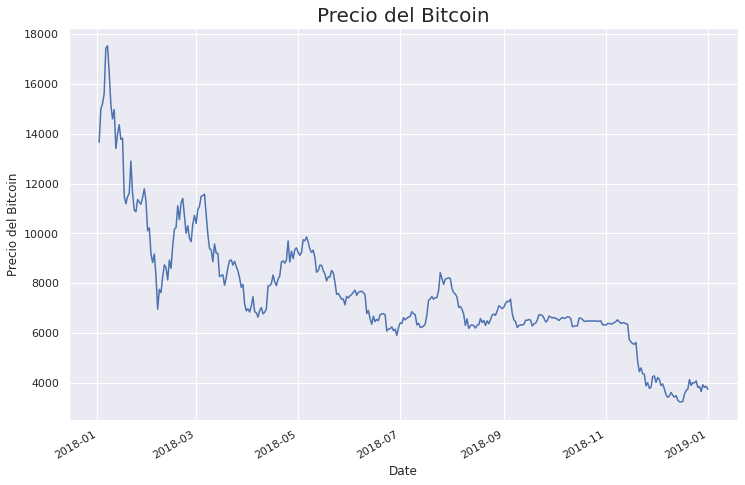

In [ ]:
bitcoin.loc['2018'].Close.plot(figsize=(12,8))
plt.title('Precio del Bitcoin',fontsize=20)
plt.ylabel('Precio del Bitcoin')
plt.show()

Los datos los podemos filtrar por fechas, veamos algunos ejemplos.

- `bitcoin.loc['2014']` me da los datos del año 2014.
- `bitcoin.loc['2014':'2015']` nos da los datos entre los años 2014 y 2015.
- `bitcoin.loc['2014-7']` nos da los datos del mes de julio de 2014.

Por ejemplo, para graficar los precios de cierre del Bitcoin durante el año 2019 podemos usar 

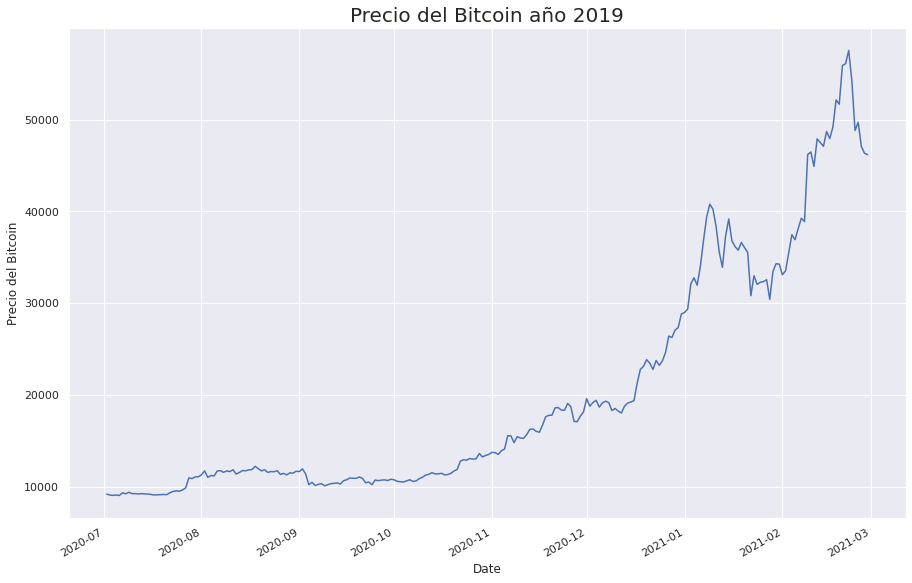

In [ ]:
bitcoin.loc['2020-7':].Close.plot(figsize=(15,10))
plt.title('Precio del Bitcoin año 2019',fontsize=20)
plt.ylabel('Precio del Bitcoin')
plt.show()

Cuando se tiene el formato adecuado de fechas en una de las columnas podemos establecer el índice  de tipo `datetime` en una sola linea usando la siguiente función   `pd.read_csv('nombre.csv',parse_dates=['fechas'],index_col='fechas')`.

Incluiremos más datos de criptoactivos con el fin de comparar los datos e ilustrar como realizar varias operaciones matemáticas.

In [ ]:
car = 'https://raw.githubusercontent.com/wincy-guerra/Times-Series-Data/main/coin_Cardano.csv'
ADA = pd.read_csv(car, parse_dates=['Date'], index_col='Date')
ADA.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2017-10-02 23:59:59,1,Cardano,ADA,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
2017-10-03 23:59:59,2,Cardano,ADA,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2017-10-04 23:59:59,3,Cardano,ADA,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
2017-10-05 23:59:59,4,Cardano,ADA,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
2017-10-06 23:59:59,5,Cardano,ADA,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08


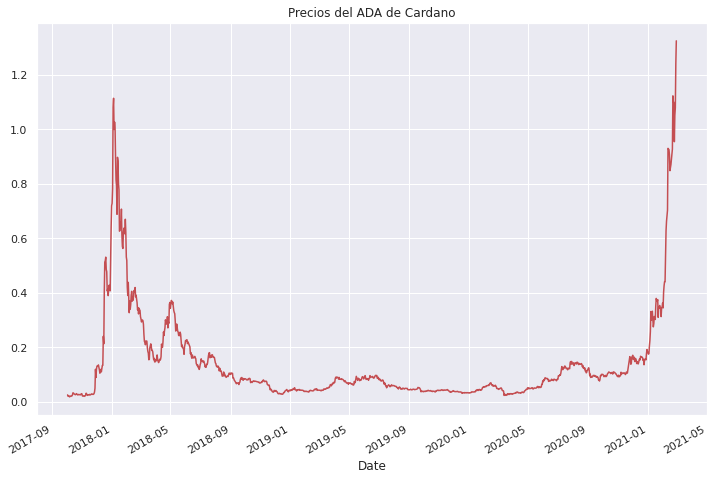

In [ ]:
ADA.Close.plot(color='r',figsize=(12,8)) #Graficamos la columna 'Close' del DataFrame ADA
plt.title('Precios del ADA de Cardano')
plt.show()

Incorporaremos datos de otras dos criptomonedas populares: Ethereum y Binance Coin.

In [ ]:
eth = 'https://raw.githubusercontent.com/wincy-guerra/Times-Series-Data/main/coin_Ethereum.csv'
bnb = 'https://raw.githubusercontent.com/wincy-guerra/Times-Series-Data/main/coin_BinanceCoin.csv'
BNB = pd.read_csv(bnb,parse_dates=['Date'],index_col='Date')
Ether = pd.read_csv(eth,parse_dates=['Date'],index_col='Date')
Ether.tail()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2021-02-23 23:59:59,2027,Ethereum,ETH,1781.409018,1378.840907,1781.409018,1570.203925,5.202986e+10,1.802510e+11
2021-02-24 23:59:59,2028,Ethereum,ETH,1710.983795,1511.018963,1571.476497,1626.575705,3.132900e+10,1.867440e+11
2021-02-25 23:59:59,2029,Ethereum,ETH,1670.224062,1465.058946,1625.393882,1475.703735,2.448168e+10,1.694427e+11
2021-02-26 23:59:59,2030,Ethereum,ETH,1559.028891,1407.979253,1478.653270,1446.033650,3.143600e+10,1.660555e+11
2021-02-27 23:59:59,2031,Ethereum,ETH,1524.932428,1433.786929,1446.929455,1459.973121,2.074210e+10,1.676759e+11


tratemos de graficar los precios de las dos criptmonedas más populares.

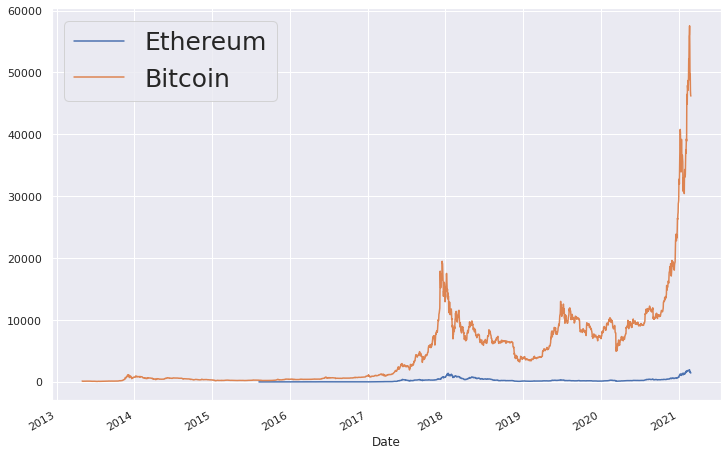

In [ ]:
Ether.Close.plot(label='Ethereum',figsize=(12,8))
bitcoin.Close.plot(label='Bitcoin')
plt.legend(fontsize=25)
plt.show()

## Comparando datos en una serie de tiempo

Note un primer problema. Es difícil comparar los precios de las criptomonedas dadas las diferencias de magnitud entre ellas. Para poder comparar el comportamiento de las series de tiempo debemos primero "normalizarlas" bajo algún criterio. Eso lo veremos un poco mas adelante. 

Crearemos ahora un nuevo DataFrame con los precios de cierre de las criptomonedas.

In [ ]:
Cryptos = pd.DataFrame() # Creamos un DataFramen Vacio
Cryptos['BTC'] = bitcoin.Close
Cryptos['ADA'] = ADA.Close
Cryptos['ETH'] = Ether.Close 
Cryptos['BNB'] = BNB.Close
Cryptos.sample(5)

,BTC,ADA,ETH,BNB
Date,,,,
2015-05-15 23:59:59,237.604996,NaN,NaN,NaN
2016-05-23 23:59:59,444.154999,NaN,13.461500,NaN
2015-04-07 23:59:59,253.179993,NaN,NaN,NaN
2016-10-18 23:59:59,637.960022,NaN,12.588500,NaN
2017-08-18 23:59:59,4160.620117,NaN,295.589996,2.384


In [ ]:
Cryptos.head()

,BTC,ADA,ETH,BNB
Date,,,,
2013-04-29 23:59:59,144.539993,NaN,NaN,NaN
2013-04-30 23:59:59,139.000000,NaN,NaN,NaN
2013-05-01 23:59:59,116.989998,NaN,NaN,NaN
2013-05-02 23:59:59,105.209999,NaN,NaN,NaN
2013-05-03 23:59:59,97.750000,NaN,NaN,NaN


Grafiquemos ahora los datos contenidos en el DataFrame `Cryptos`.

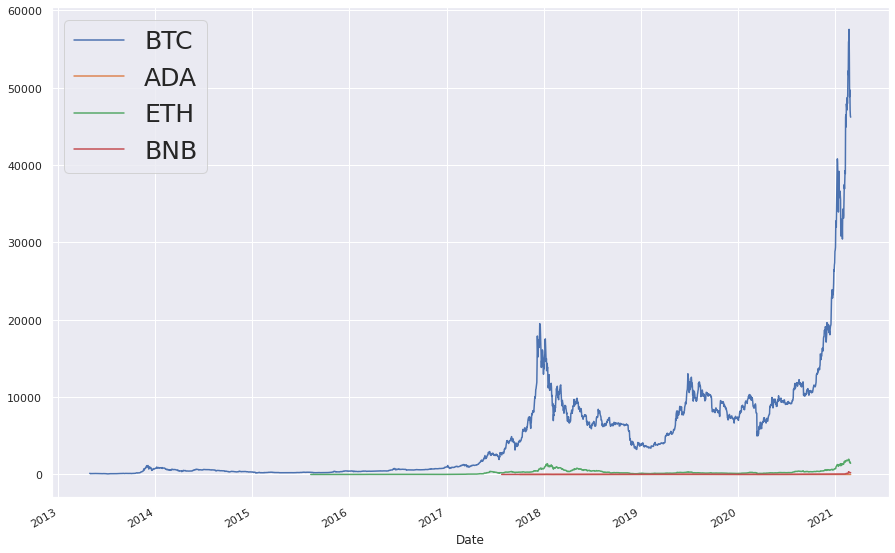

In [ ]:
Cryptos.plot(figsize=(15,10))
plt.legend(fontsize=25)
plt.show()

Para poder visualzar el comportamiento del precio de  las criptomonedas distintas al bitcoin una primera alternativa puede ser  usar el argumento `subplots=True`.

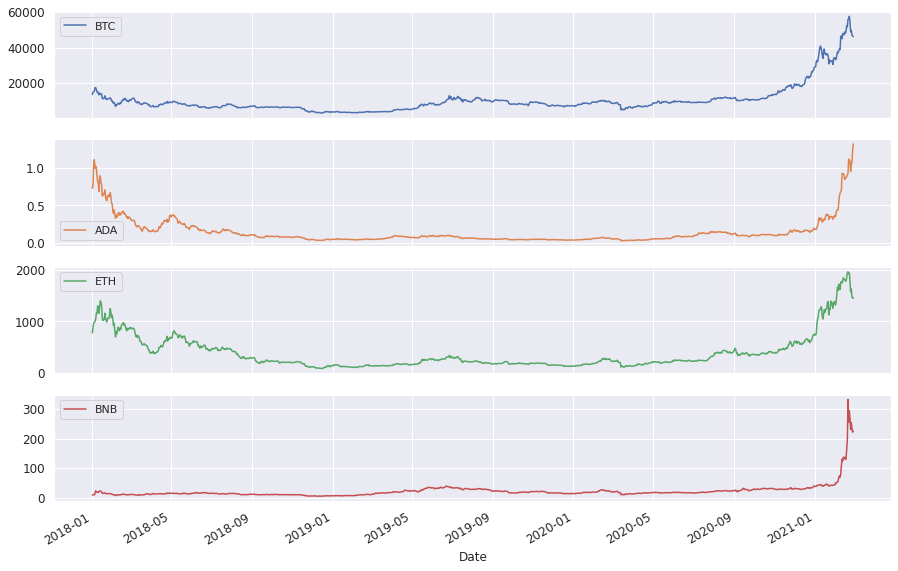

In [ ]:
Cryptos['2018':].plot(subplots=True,figsize=(15,10),fontsize= 12) #Fraficamos precios del 2018 en adelante
plt.show()

Consideraremos los datos del DataFrame `Cryptos` desde el año 2019 en adelante.

In [ ]:
Cryptos = Cryptos.loc['2019':] # Tomamos los datos desde el años 2019 en adelante
Cryptos.head()

In [ ]:
Cryptos.plot()
plt.show()

Supongamos que el 1 de enero de 2019 invertimos 100 dólares en alguna de las criptomonedas listadas anteriormente **¿Cuál cree que hubiera sido la mejor inversión si vendemos el día 28 de febrero del 2021?**.

Recordemos que el comando `df.iloc[8]` nos devuelve la fila 9 del DataFrame.

In [ ]:
Cryptos.iloc[0]

Normalizaremos los datos en el DataFrame de tal forma que todas las criptomonedas empiecen en 100 dólares (así podremos ver el cambio de precio en términos porcentuales). 
Un punto importante de las siguientes líneas de código es **notar las distintas operaciones matemáticas que podemos implementar en nuestro DataFrame**.

- `df.div(numero)` divide los elementos del DataFrame por `numero`.
- `df.mul(numero)` multiplica los elementos del DataFrame por `numero`.

In [ ]:
normalizado = Cryptos.div(Cryptos.iloc[0]).mul(100)
normalizado.head()

Grafiquemos ahora el DataFrame `normalizado` para poder responder a nuestra pregunta sobre cuál hubiera sido la mejor inversión en enero del 2019

In [ ]:
normalizado.plot(figsize=(12,8))
plt.title('Cambio porcentual de la inversión',fontsize=20)
plt.show()

In [ ]:
normalizado.tail()

**Respuesta: La mejor inversión hubiera sido  en Binance Coin. Invirtiendo 100 dólares en enero del 2019 hubieramos tenido 3700 dólares el 28 de febrero de 2021**

## Modelos de precios y ruido blanco

Veremos ahora datos sobre el precio del dólar en Colombia y haremos algunos análisis con estos datos. 

In [ ]:
dol = 'https://raw.githubusercontent.com/wincy-guerra/Times-Series-Data/main/1.1.1.TCM_Serie%20hist%C3%B3rica%20IQY_1.csv'
dolar = pd.read_csv(dol,sep=';')
dolar.tail()

,Fecha,TRM
10722,05/04/2021,"$ 3.678,62"
10723,06/04/2021,"$ 3.645,79"
10724,07/04/2021,"$ 3.645,14"
10725,08/04/2021,"$ 3.639,62"
10726,09/04/2021,"$ 3.634,07"


In [ ]:
dolar['Fecha'] = pd.to_datetime(dolar.Fecha,format= '%d/%m/%Y')
dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10727 entries, 0 to 10726
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   10727 non-null  datetime64[ns]
 1   TRM     10727 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 167.7+ KB


In [ ]:
dolar.set_index('Fecha',inplace=True)
dolar.tail()

,TRM
Fecha,
2021-04-05,"$ 3.678,62"
2021-04-06,"$ 3.645,79"
2021-04-07,"$ 3.645,14"
2021-04-08,"$ 3.639,62"
2021-04-09,"$ 3.634,07"


Note que la columna `TRM` no viene en tipo `float`.

Necesitamos cambiar los datos de la columna a tipo float para poder graficar los precios del dólar y hacer algunos análisis. Primero eliminamos el simbolo $ y luego reemplazamos la `,`por un `.`.

In [ ]:
dolar['TRM'] = dolar['TRM'].apply(lambda x: x.replace('$',''))
dolar['TRM'] = dolar['TRM'].apply(lambda x: x.replace('.',''))
dolar['TRM'] = dolar['TRM'].apply(lambda x: x.replace(',','.'))
dolar.tail()

,TRM
Fecha,
2021-04-05,3678.62
2021-04-06,3645.79
2021-04-07,3645.14
2021-04-08,3639.62
2021-04-09,3634.07


In [ ]:
dolar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10727 entries, 1991-11-27 to 2021-04-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TRM     10727 non-null  object
dtypes: object(1)
memory usage: 167.6+ KB


Ahora pasamos la columna `TRM` a formato numérico.

In [ ]:
dolar['TRM'] = pd.to_numeric(dolar.TRM)
dolar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10727 entries, 1991-11-27 to 2021-04-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TRM     10727 non-null  float64
dtypes: float64(1)
memory usage: 167.6 KB


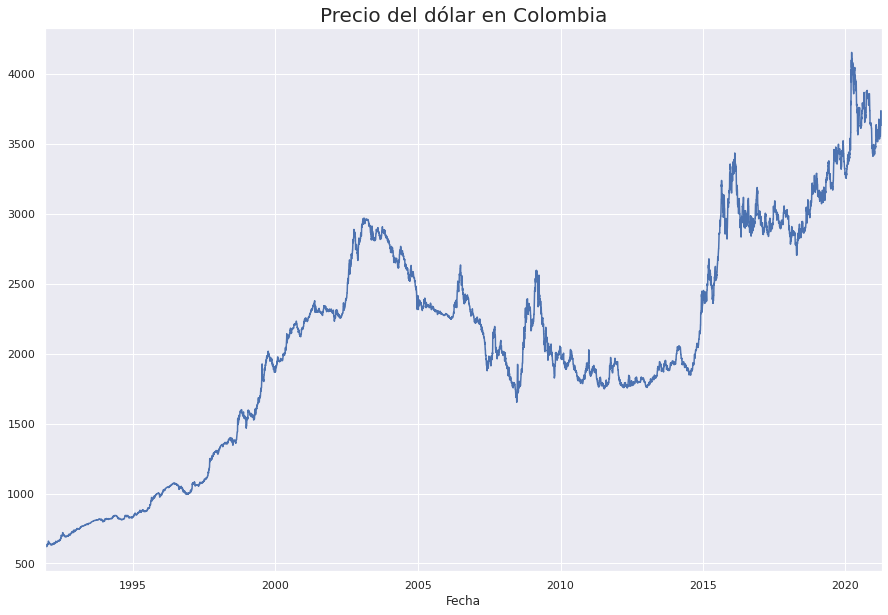

In [ ]:
dolar.TRM.plot(figsize=(15,10))
plt.title('Precio del dólar en Colombia',fontsize=20)
plt.show()

Trataremos de calcular ahora los cambios porcentuales diarios del precio del dólar. En efecto, cuando se estudian series financieras es usual estudiar los retornos o cambios porcentuales por periodos en lugar de estudiar el precio neto del activo. 

Para calcular los cambios porcentuales mostraremos algunas operaciones básicas que vienen incorporadas en `pandas`.

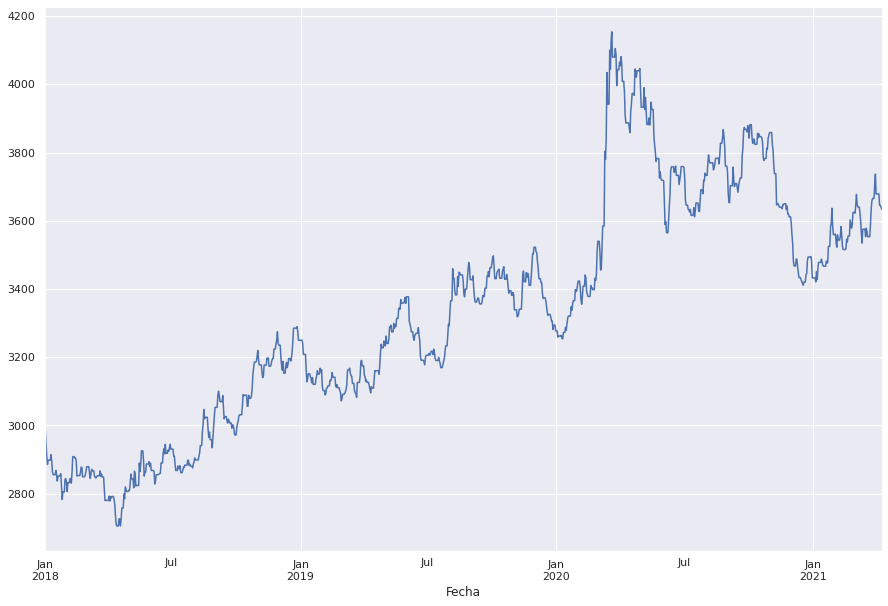

In [ ]:
dolar2018 = dolar.loc['2018':]
dolar2018.TRM.plot(figsize=(15,10))
plt.show()

Usaremos el método `.shift()` y veamos qué sucede.

In [ ]:
dolar2018['pasado']=dolar2018['TRM'].shift()
dolar2018.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TRM,pasado
Fecha,,
2018-01-01,2984.00,NaN
2018-01-02,2984.00,2984.00
2018-01-03,2940.94,2984.00
2018-01-04,2908.68,2940.94
2018-01-05,2885.76,2908.68


De hecho el método `shift()` admite el argumento `periods=num` donde `num`  puede incluso ser negativo.

Calcularemos el porcentaje de cambio del precio del dólar usando operaciones básicas en Pandas. Para esto, tenga presente que si $x_t$ es el precio el día $t$ y $x_{t-1}$ el precio del día anterior, entonces usando una regla de tres podemos ver que el porcentaje de cambio en el precio viene dado por 
$$ y = 100\Big(\frac{x_t}{x_{t-1}}-1\Big)$$

In [ ]:
dolar2018['retorno'] = dolar['TRM'].div(dolar2018.pasado).sub(1).mul(100)
dolar2018.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TRM,pasado,retorno
Fecha,,,
2018-01-01,2984.00,NaN,NaN
2018-01-02,2984.00,2984.00,0.000000
2018-01-03,2940.94,2984.00,-1.443029
2018-01-04,2908.68,2940.94,-1.096928
2018-01-05,2885.76,2908.68,-0.787986


Grafiquemos ahora los retornos diarios en el precio del dolar. Es importante que note la forma de esta gráfica.

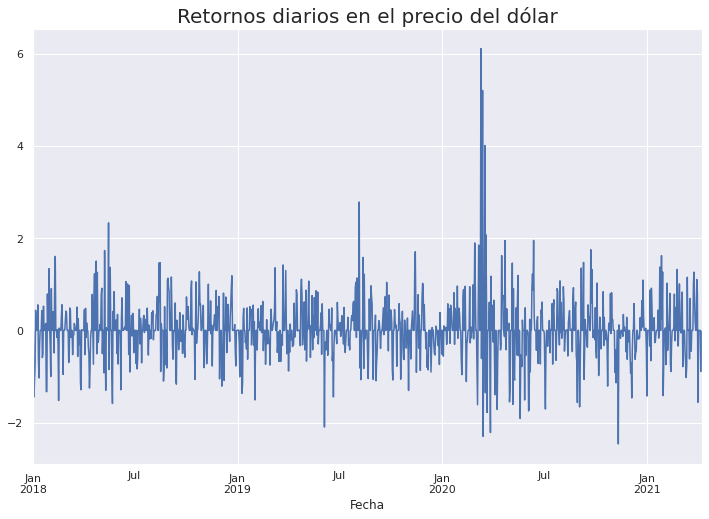

In [ ]:
dolar2018.retorno.plot(figsize=(12,8))
plt.title('Retornos diarios en el precio del dólar',fontsize=20)
plt.show()

Un modelo estándar para simular los precios de un activo involucra el concepto de **ruido blanco**. Un ruido blanco es una serie de tiempo donde en cada tiempo se tiene 

- Media constante
- Varianza constante
- Autocorrelación cero en cada retraso (lo veremos un poco más adelante).

Si las distribuciones en cada tiempo son normales, entonces tendremos un **ruido blanco gaussiano**. En la siguiente línea de código simularemos un ruido blanco gaussiano.


In [ ]:
# generamos 500 muestras de una distribución normal estándar
ruido = np.random.normal(0,1,500)
plt.plot(ruido)
plt.title('Simulación ruido blanco gaussiano')
plt.show()

Note que los dos últimos gráficos tienen algo de similitud. De hecho, usualmente los precios de un activo se modelan como una **caminata aleatoria**. En este caso se supone que el precio de un activo hoy es igual al precio de ayer más un factor de retorno que es representado por un ruido blanco, es decir, 

$$ x_t = x_{t-1}+\epsilon_t $$

Donde $\epsilon_t$ es un ruido blanco. Usando este argumento nosotros podemos simular el precio de un activo (de hecho simular una caminata aleatoria).

In [ ]:
s = [1,2,3,4,5]
np.cumsum(s)

Ahora simulemos una caminata aleatoria cuyo ruido es un ruido blanco gaussiano centrado en cero.

In [ ]:
pasos = np.random.normal(0.01,1,500)
pasos[0]=0
X = 100 + np.cumsum(pasos)
plt.plot(X)
plt.title('Caminata aleatoria simulada')
plt.show()

**Ruido multiplicativo:** teoricamente hablando, la curva de arriba podría ser negativa, dando lugar a precios negativos. Es por esto que es usual agregar ruidos multiplicativos (en lugar de ruidos aditivos).

In [ ]:
# Generamos los 500 pasos de la caminata con una ligera tendencia positiva
steps = np.random.normal(0.001,0.01,500) + 1
steps[0]=1
P = 100*np.cumprod(steps)
plt.plot(P)
plt.title('Caminata aleatoria con tendencia y ruido multiplicativo')
plt.show()

Como una nota final es importante comentar que los cálculos para hallar los retornos diarios que hicimos anteriormente se pueden computar directamente con una función de `pandas`. La función `.pct_change(periods= )` permite un argumento para calcular el porcentaje de retorno en distintos periodos de tiempo.

In [ ]:
dolar2018.head()

In [ ]:
cambio = ['diario','mensual','anual']
dolar2018['diario']= dolar2018.TRM.pct_change().mul(100)
dolar2018['mensual'] = dolar2018.TRM.pct_change(periods=30).mul(100)
dolar2018['anual'] = dolar2018.TRM.pct_change(periods=360).mul(100)
dolar2018.head()

In [ ]:
dolar2018.tail()

In [ ]:
dolar2018[cambio].plot(subplots=True,figsize=(12,8),title='Retornos para distintos intervalos de tiempo')
#plt.title('Retornos para distintos intervalos de tiempo')
plt.show()

## *Upsampling*, *Downsampling* y *rolling windows*.

En algunos casos necesitamos cambiar la frecuencia de medida de nuestros datos. Por ejemplo, si tenemos datos semanales podríamos querer tener datos diarios, a éste proceso se le conoce como *upsampling*. El principal problema en éste caso es cómo llenar las nuevas casillas de los datos y esto depende de cada problema en particular.

Por otro lado, podemos tener datos diarios y querer reducir nuestra cantidad de datos a, por ejemplo, datos mensuales (*downsampling*). En este caso el problema es cómo "comprimir" los datos (*aggregate*).

- `.asfreq()` 

Exploremos algunas de las opciones de `pandas` para hacer estas tareas. En la siguientes lineas veremos un ejemplo de "upsample", es decir, aumentar el tamaño de nuestro conjunto de datos.

In [ ]:
dolar.head()

,TRM
Fecha,
1991-11-27,693.32
1991-11-28,693.99
1991-11-29,694.70
1991-11-30,694.70
1991-12-01,643.42


Note que tenemos valor del precio del dolar diarios. Qué ocurre si queremos datos, por ejemplo, cada 6 horas.

In [ ]:
dolar_6 = dolar.asfreq('6H')
dolar_6.head()

Note que ahora tenemos muchos más "espacios" es nuestros datos, pero aparece `NaN` en las nuevas casillas. Existen distintas maneras para llenar los espacios.

Algunas opciones que tenemos para llenar los valores `NaN` que nos ofrece  Pandas.

- `horas['ffill'] = ETH.asfreq('H', method = 'ffill')`

- `horas['bfill'] = ETH.asfreq('H , method = 'bfill')`

- `horas['valor'] = ETH.asfreq('H', fill_value = 0)`

**Correr estas líneas de código y revisar qué ocurre en el DataFrame.**



In [ ]:
dolar_6 = dolar.asfreq('6H',method='ffill')
dolar_6.head()

In [ ]:
dolar_6 = dolar.asfreq('6H').interpolate()
dolar_6.head()

Veamos ahora algunas de las herramientas para hacer "downsampling", es decir, hacer más pequeño el conjunto de nuestros datos.

- `.resample()`

Recordemos la serie de precios del dolar.

In [ ]:
dolar['2015':].plot(figsize=(15,10))
plt.show()

Veamos ahora como hacer *Downsampling* para esta serie de tiempo que contiene datos diarios. En este caso usamos el método `.resample('argumento').agg()`. Dentro de los argumentos de frecuencia podemos usar 

- '`W'` ----> Semanal
- `'M'` ----> final del mes
- `'MS'` ---> inicio del mes
- `'BM'` ---> mes del calendario de negocios (business)
- `'MMS'` --> inicio del mes de negocios


In [ ]:
dolar2015 = dolar.loc['2015':]
dolar2015.shape

(2291, 1)

Ahora ahoramos un `resample('W').last()` que nos dará los datos semanales, tomando el precio del dólar el último día de la semana.

In [ ]:
dolar2015_M = dolar2015.TRM.resample('3M').last()
dolar2015_M.shape

(26,)

Una de las ventajas de hacer *downsampling* es poder visualizar tendencias en las series de tiempo (eliminando ruido). Veamos el siguiente gráfico

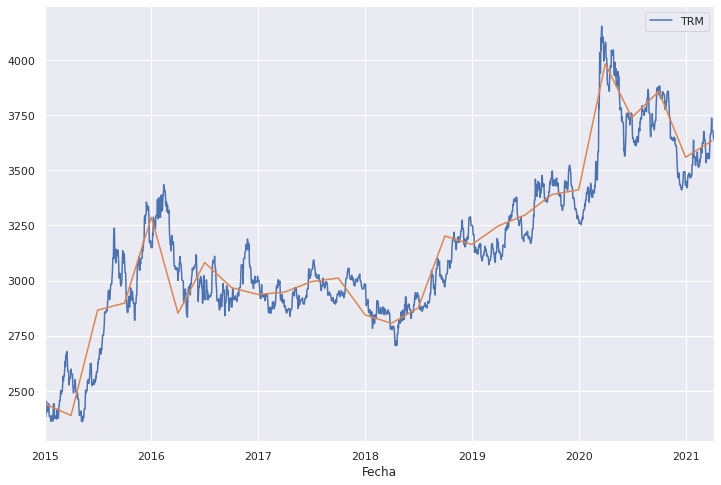

In [ ]:
dolar2015.plot(figsize=(12,8))
dolar2015_M.plot()
plt.show()

Podemos  aplicar más de una función a nuestro "resumen de datos" y también aplicar  funciones personalizadas usando el método `df.Column.apply()`

In [ ]:
dolar2015.TRM.resample('2M').agg(['mean','median','std']).tail()

,mean,median,std
Fecha,,,
2020-09-30,3766.889508,3767.050,58.968480
2020-11-30,3760.921967,3807.130,95.827289
2021-01-31,3478.724355,3472.975,50.587616
2021-03-31,3585.117627,3575.300,51.868572
2021-05-31,3661.968889,3678.620,20.028375


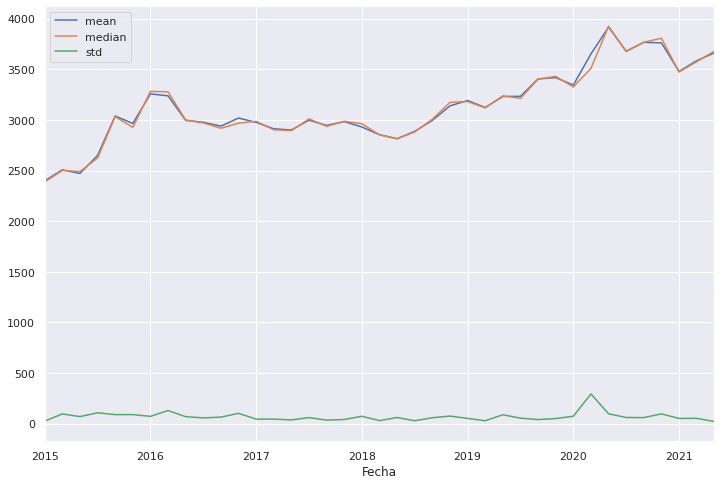

In [ ]:
#dolar2015.plot(figsize=(15,10))
dolar2015.TRM.resample('2M').agg(['mean','median','std']).plot(figsize=(12,8))
plt.show()

Aunque usamos `.resample()` para tratar de ver la tendencia en la serie de tiempo, de hecho el método estándar para hacer este tipo de cosas se conoce como *rolling windows* y los podemos implementar en `pandas` usando el método `.rolling(window).agg()`.

In [ ]:
dolar2015.rolling(30).mean().shape

(2291, 1)

In [ ]:
dolar2015['Mensual'] = dolar2015.TRM.rolling(30).mean()
dolar2015['Anual'] = dolar2015.TRM.rolling(360).mean()
dolar2015.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TRM,Mensual,Anual
Fecha,,,
2021-04-05,3678.62,3617.681000,3689.640667
2021-04-06,3645.79,3617.867333,3688.971222
2021-04-07,3645.14,3618.032000,3688.299972
2021-04-08,3639.62,3618.565667,3687.613389
2021-04-09,3634.07,3619.742333,3686.957167


In [ ]:
dolar2015.head()

,TRM,Mensual,Anual
Fecha,,,
2015-01-01,2392.46,NaN,NaN
2015-01-02,2392.46,NaN,NaN
2015-01-03,2383.37,NaN,NaN
2015-01-04,2383.37,NaN,NaN
2015-01-05,2383.37,NaN,NaN


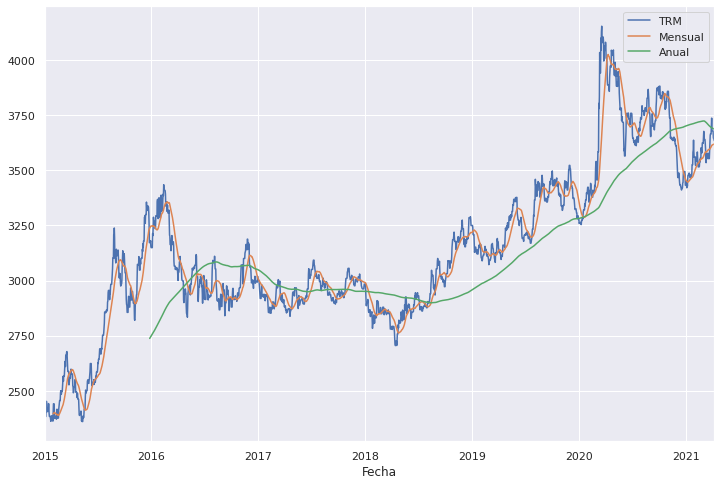

In [ ]:
dolar2015.plot(figsize=(12,8))
plt.show()

Veamos como aplicar `rolling(window).agg()` para calcular cuantiles en ventanas de observación fija.

In [ ]:
dolar2018=dolar.loc['2018':]
dolar2018.head()

,TRM
Fecha,
2018-01-01,2984.00
2018-01-02,2984.00
2018-01-03,2940.94
2018-01-04,2908.68
2018-01-05,2885.76


In [ ]:
rolling = dolar2018.TRM.rolling(30)
dolar2018['q10'] = rolling.quantile(0.1)
dolar2018['q90'] = rolling.quantile(0.9)
dolar2018.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TRM,q10,q90
Fecha,,,
2018-01-01,2984.00,NaN,NaN
2018-01-02,2984.00,NaN,NaN
2018-01-03,2940.94,NaN,NaN
2018-01-04,2908.68,NaN,NaN
2018-01-05,2885.76,NaN,NaN


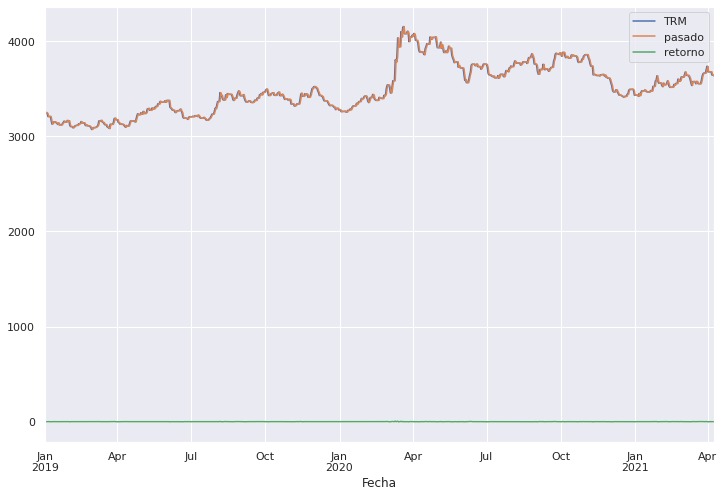

In [ ]:
dolar2018['2019':].plot(figsize=(12,8))
plt.show()

## Coeficiente de correlación de Pearson
En ocasiones es importante conocer sobre el comportamiento común entre dos series de tiempo. Uno de los métodos más comunes para determinar relaciones de linealidad entre dos cantidades es el **coeficiente de correlación de Pearson**.

Este coeficiente está dado por   
$$ \rho_{XY}=\frac{COV(X,Y)}{\sigma_X \sigma_Y}$$
donde $COV(X,Y)$ denota la covarianza entre  $X$ y $Y$ y $\sigma_X$ es la desviación estándar. En la gráfica podemos apreciar distintas gráficas y sus correlaciones.

<p float="center">
  <img src='https://raw.githubusercontent.com/wincy-guerra/Times-Series-Data/main/pearson.png' width="700" />
</p>
Example_Structural_equation_model.png


Recordemos el DataFrame que contiene distintos valores de criptomonedas

In [ ]:
Cryptos.tail()

,BTC,ADA,ETH,BNB
Date,,,,
2021-02-23 23:59:59,48824.426869,0.954709,1570.203925,230.994252
2021-02-24 23:59:59,49705.333316,1.051657,1626.575705,254.359132
2021-02-25 23:59:59,47093.853019,1.079116,1475.703735,233.885956
2021-02-26 23:59:59,46339.760083,1.241105,1446.033650,221.680429
2021-02-27 23:59:59,46188.451275,1.324860,1459.973121,225.249443


Podemos computar el coeficiente de correlación de Pearson usando el método `.corr()`.

In [ ]:
Cryptos.corr()

,BTC,ADA,ETH,BNB
BTC,1.000000,0.661878,0.864248,0.778320
ADA,0.661878,1.000000,0.884922,0.572544
ETH,0.864248,0.884922,1.000000,0.558033
BNB,0.778320,0.572544,0.558033,1.000000


Un asunto importante es que cuando se estudian las relaciones entre los precios de distintos activos no se debe comparar el valor neto del precio sino estudiar las correlaciones en sus tasas de retorno.

In [ ]:
Cryptos_ret = Cryptos.pct_change(periods=30)
Cryptos_ret.head()

,BTC,ADA,ETH,BNB
Date,,,,
2013-04-29 23:59:59,NaN,NaN,NaN,NaN
2013-04-30 23:59:59,NaN,NaN,NaN,NaN
2013-05-01 23:59:59,NaN,NaN,NaN,NaN
2013-05-02 23:59:59,NaN,NaN,NaN,NaN
2013-05-03 23:59:59,NaN,NaN,NaN,NaN


In [ ]:
Cryptos_ret.tail()

,BTC,ADA,ETH,BNB
Date,,,,
2021-02-23 23:59:59,0.512089,1.697825,0.128337,4.515411
2021-02-24 23:59:59,0.535708,2.058155,0.228147,5.110920
2021-02-25 23:59:59,0.445934,2.134837,0.087429,4.609484
2021-02-26 23:59:59,0.522704,2.964174,0.153885,4.407515
2021-02-27 23:59:59,0.380157,2.827652,0.095671,4.296360


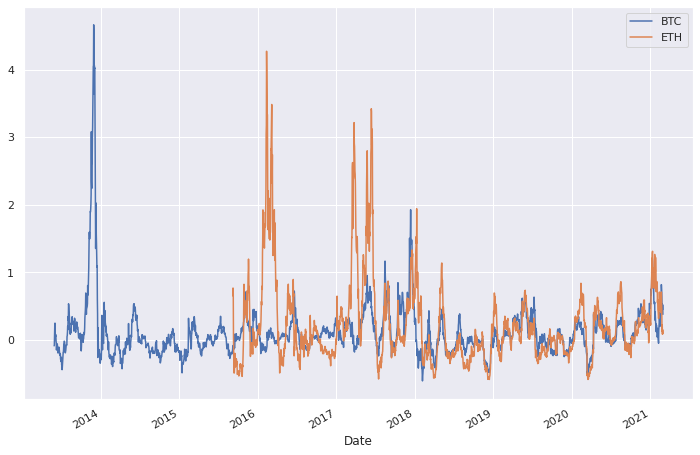

In [ ]:
Cryptos_ret[['BTC','ETH']].plot(figsize=(12,8))
plt.show()

Veamos ahora la correlación en el DataFrame de retornos mensuales.

In [ ]:
Cryptos_ret.corr()

,BTC,ADA,ETH,BNB
BTC,1.000000,0.518010,0.381582,0.289423
ADA,0.518010,1.000000,0.557813,0.587780
ETH,0.381582,0.557813,1.000000,0.356360
BNB,0.289423,0.587780,0.356360,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


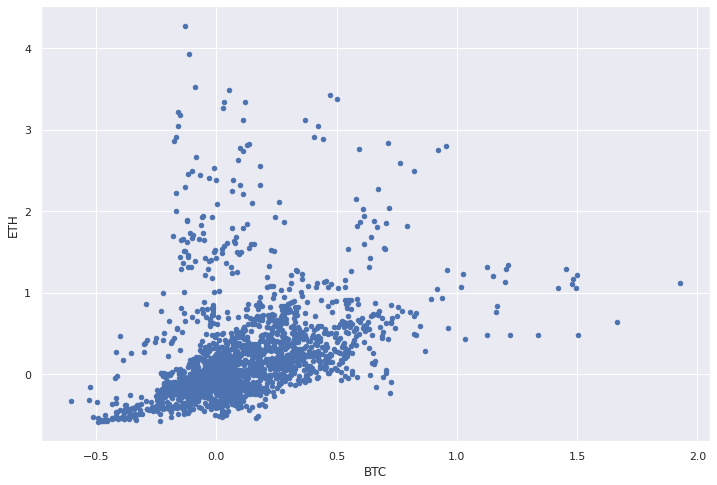

In [ ]:
Cryptos_ret.plot.scatter('BTC','ETH')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


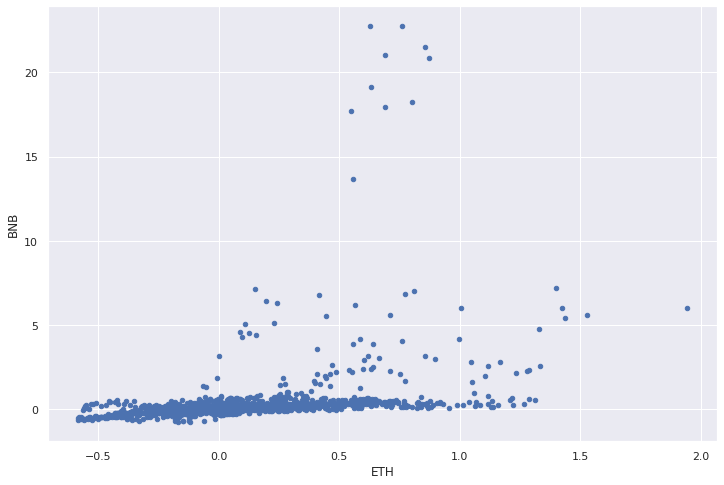

In [ ]:
Cryptos_ret.plot.scatter('ETH','BNB')
plt.show()

Una herramienta interesante para visualizar las correlaciones en una matriz son los mapas de calor. Podemos usar la librería `seaborn` para realizar este tipo de gráficos.

In [ ]:
corr = Cryptos_ret.corr()
corr

,BTC,ADA,ETH,BNB
BTC,1.000000,0.518010,0.381582,0.289423
ADA,0.518010,1.000000,0.557813,0.587780
ETH,0.381582,0.557813,1.000000,0.356360
BNB,0.289423,0.587780,0.356360,1.000000


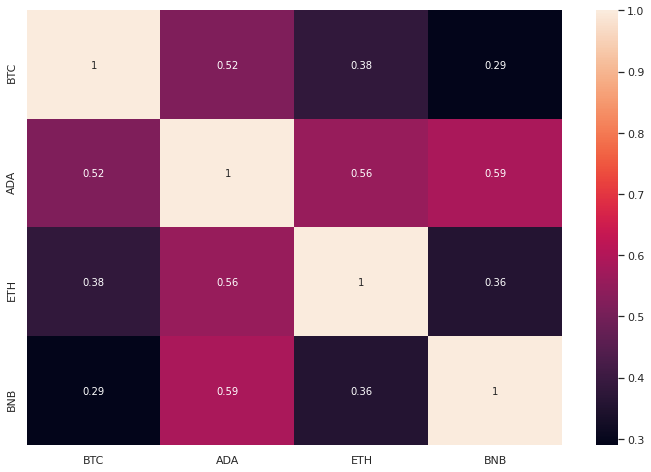

In [ ]:
sns.heatmap(corr,annot=True)

## Ejercicios con una serie de tiempo climática

Esta última parte contiene algunos ejercicios básicos usando una serie de tiempo climática. Lo interesante es mostrar algunos de los problemas que se encuentran en las bases de datos que nos encontraremos típicamente analizando datos. 

In [ ]:
cli = 'https://raw.githubusercontent.com/wincy-guerra/Times-Series-Data/main/Datos%20climaticos_1.csv'
#Note los argumentos "encoding"  y "sep" en la función
clima = pd.read_csv(cli,encoding='latin',sep=';')
clima.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FECHA,AO,MES,DêA,hora,Solar Rad (wat/m2),Temperature (*C),RH (%),Wind Dir (Deg),Wind Gust (km/h),Wind Speed (km/h),Rainfall (mm)
0,22/03/2013,2013,3,22,15:36,"111,8","31,6","57,7",352,6,6,0
1,22/03/2013,2013,3,22,16:06,"58,8","31,2","60,5",35,11,0,0
2,22/03/2013,2013,3,22,16:36,"11,8","29,5",66,41,3,0,0
3,22/03/2013,2013,3,22,17:06,0,"27,2","81,2",41,0,0,0
4,22/03/2013,2013,3,22,17:36,0,"25,6","86,6",41,0,0,0


¿Que clase de datos tenemos en nuestro DataFrame?

In [ ]:
clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77352 entries, 0 to 77351
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FECHA               77352 non-null  object
 1   AO                 77352 non-null  int64 
 2   MES                 77352 non-null  int64 
 3   DêA                 77352 non-null  int64 
 4   hora                77352 non-null  object
 5   Solar Rad (wat/m2)  77352 non-null  object
 6   Temperature (*C)    77325 non-null  object
 7   RH (%)              77352 non-null  object
 8   Wind Dir (Deg)      77352 non-null  object
 9   Wind Gust (km/h)    77352 non-null  object
 10  Wind Speed (km/h)   77352 non-null  object
 11  Rainfall (mm)       77351 non-null  object
dtypes: int64(3), object(9)
memory usage: 7.1+ MB


Para empezar renombranos las columnas

In [ ]:
clima.columns = ['FECHA', 'AÑO', 'MES', 'DÍA', 'hora', 'Solar Rad (wat/m2)',
       'Temperatura', 'RH (%)', 'Wind Dir (Deg)', 'Wind Gust (km/h)',
       'Wind Speed (km/h)', 'Rainfall (mm)']
clima.head()

,FECHA,AÑO,MES,DÍA,hora,Solar Rad (wat/m2),Temperatura,RH (%),Wind Dir (Deg),Wind Gust (km/h),Wind Speed (km/h),Rainfall (mm)
0,22/03/2013,2013,3,22,15:36,"111,8","31,6","57,7",352,6,6,0
1,22/03/2013,2013,3,22,16:06,"58,8","31,2","60,5",35,11,0,0
2,22/03/2013,2013,3,22,16:36,"11,8","29,5",66,41,3,0,0
3,22/03/2013,2013,3,22,17:06,0,"27,2","81,2",41,0,0,0
4,22/03/2013,2013,3,22,17:36,0,"25,6","86,6",41,0,0,0


Ahora transformaremos las fechas a tipo `datetime`. Note que tenemos varias mediciones en el día (24). 

In [ ]:
clima['FECHA'] = pd.to_datetime(clima['FECHA'],format= '%d/%m/%Y')
clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77352 entries, 0 to 77351
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FECHA               77352 non-null  datetime64[ns]
 1   AÑO                 77352 non-null  int64         
 2   MES                 77352 non-null  int64         
 3   DÍA                 77352 non-null  int64         
 4   hora                77352 non-null  object        
 5   Solar Rad (wat/m2)  77352 non-null  object        
 6   Temperatura         77325 non-null  object        
 7   RH (%)              77352 non-null  object        
 8   Wind Dir (Deg)      77352 non-null  object        
 9   Wind Gust (km/h)    77352 non-null  object        
 10  Wind Speed (km/h)   77352 non-null  object        
 11  Rainfall (mm)       77351 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 7.1+ MB


Modificamos la clumna hora para integrarla en nuestra columna fecha.

In [ ]:
clima.hora = clima.hora + ':00'
clima.head()

,FECHA,AÑO,MES,DÍA,hora,Solar Rad (wat/m2),Temperatura,RH (%),Wind Dir (Deg),Wind Gust (km/h),Wind Speed (km/h),Rainfall (mm)
0,2013-03-22,2013,3,22,15:36:00,"111,8","31,6","57,7",352,6,6,0
1,2013-03-22,2013,3,22,16:06:00,"58,8","31,2","60,5",35,11,0,0
2,2013-03-22,2013,3,22,16:36:00,"11,8","29,5",66,41,3,0,0
3,2013-03-22,2013,3,22,17:06:00,0,"27,2","81,2",41,0,0,0
4,2013-03-22,2013,3,22,17:36:00,0,"25,6","86,6",41,0,0,0


In [ ]:
clima.hora = pd.to_timedelta(clima.hora)
clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77352 entries, 0 to 77351
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   FECHA               77352 non-null  datetime64[ns] 
 1   AÑO                 77352 non-null  int64          
 2   MES                 77352 non-null  int64          
 3   DÍA                 77352 non-null  int64          
 4   hora                77352 non-null  timedelta64[ns]
 5   Solar Rad (wat/m2)  77352 non-null  object         
 6   Temperatura         77325 non-null  object         
 7   RH (%)              77352 non-null  object         
 8   Wind Dir (Deg)      77352 non-null  object         
 9   Wind Gust (km/h)    77352 non-null  object         
 10  Wind Speed (km/h)   77352 non-null  object         
 11  Rainfall (mm)       77351 non-null  object         
dtypes: datetime64[ns](1), int64(3), object(7), timedelta64[ns](1)
memory usage: 7.1+ MB


Definiremos ahora una nueva columna que contenga el día y la hora de cada medición.

In [ ]:
clima['date'] = clima['FECHA'] + clima['hora']
clima.head()

,FECHA,AÑO,MES,DÍA,hora,Solar Rad (wat/m2),Temperatura,RH (%),Wind Dir (Deg),Wind Gust (km/h),Wind Speed (km/h),Rainfall (mm),date
0,2013-03-22,2013,3,22,0 days 15:36:00,"111,8","31,6","57,7",352,6,6,0,2013-03-22 15:36:00
1,2013-03-22,2013,3,22,0 days 16:06:00,"58,8","31,2","60,5",35,11,0,0,2013-03-22 16:06:00
2,2013-03-22,2013,3,22,0 days 16:36:00,"11,8","29,5",66,41,3,0,0,2013-03-22 16:36:00
3,2013-03-22,2013,3,22,0 days 17:06:00,0,"27,2","81,2",41,0,0,0,2013-03-22 17:06:00
4,2013-03-22,2013,3,22,0 days 17:36:00,0,"25,6","86,6",41,0,0,0,2013-03-22 17:36:00


Establecemos ahora los índices de nuestro DataFrame

In [ ]:
clima.set_index('date',inplace=True)
clima.tail()

,FECHA,AÑO,MES,DÍA,hora,Solar Rad (wat/m2),Temperatura,RH (%),Wind Dir (Deg),Wind Gust (km/h),Wind Speed (km/h),Rainfall (mm)
date,,,,,,,,,,,,
2018-03-31 21:40:00,2018-03-31,2018,3,31,0 days 21:40:00,0,"22,5","99,5",0,6,0,0
2018-03-31 22:10:00,2018-03-31,2018,3,31,0 days 22:10:00,0,"22,5","99,5",35,6,0,0
2018-03-31 22:40:00,2018-03-31,2018,3,31,0 days 22:40:00,0,"22,5","99,5",35,2,0,0
2018-03-31 23:10:00,2018-03-31,2018,3,31,0 days 23:10:00,0,"22,5","99,5",35,0,0,0
2018-03-31 23:40:00,2018-03-31,2018,3,31,0 days 23:40:00,0,"22,5","99,5",35,0,0,0


Escogemos algunos de los datos del Dataframe para hacer algunos ejercicio.

In [ ]:
clima = clima[['Temperatura','Rainfall (mm)']]
clima.sample(10)

,Temperatura,Rainfall (mm)
date,,
2016-08-11 23:56:00,"23,3",0
2017-06-10 05:10:00,"22,1",0
2018-02-27 17:18:00,"32,4",0
2013-11-30 10:17:00,"29,5",0
2017-11-11 18:03:00,"28,3",0
2016-09-27 01:12:00,"23,7",0
2015-01-27 07:05:00,"24,8",0
2015-10-01 02:47:00,"22,5",0
2016-07-08 10:06:00,"27,6",0


Ojo con la coma en las columnas `Temperatura` y `Rainfall (mm)` pues la función que usaremos para transformar los datos a tipo float generará errores. 

In [ ]:
clima['Temperatura']=clima['Temperatura'].apply(lambda x: str(x))
clima['Temperatura']=clima['Temperatura'].apply(lambda x: x.replace(',','.'))
clima.sample(7)

,Temperatura,Rainfall (mm)
date,,
2015-11-19 20:49:00,26.4,0
2014-08-14 13:52:00,28,0
2015-05-28 02:56:00,23.3,0
2016-06-18 05:14:00,21.7,0
2017-01-11 11:01:00,31.2,0
2014-12-28 19:00:00,25.2,0
2014-06-19 04:19:00,22.5,0


In [ ]:
clima['Rainfall (mm)']=clima['Rainfall (mm)'].apply(lambda x: str(x))
clima['Rainfall (mm)']=clima['Rainfall (mm)'].apply(lambda x: x.replace(',','.'))

Queremos graficar los datos de Temperatura y lluvia pero ¿podemos?

In [ ]:
clima.sample(6)

,Temperatura,Rainfall (mm)
date,,
2015-12-31 23:38:00,21.7,0
2014-07-24 18:22:00,27.2,0
2014-10-09 14:31:00,33.2,0
2015-07-02 23:20:00,22.9,0
2014-04-25 19:56:00,24.4,0
2015-07-06 03:50:00,22.9,2.8


Trasformemos los datos a tipo float

In [ ]:
clima['Temperatura'] = pd.to_numeric(clima['Temperatura'],errors='coerce')


In [ ]:
clima['Rainfall (mm)'] = pd.to_numeric(clima['Rainfall (mm)'],errors='coerce')

In [ ]:
clima.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77352 entries, 2013-03-22 15:36:00 to 2018-03-31 23:40:00
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperatura    77320 non-null  float64
 1   Rainfall (mm)  77346 non-null  float64
dtypes: float64(2)
memory usage: 1.8 MB


¿Cuántos datos tipo `NaN` tenemos?

In [ ]:
clima.isna().sum()

Temperatura      32
Rainfall (mm)     6
dtype: int64

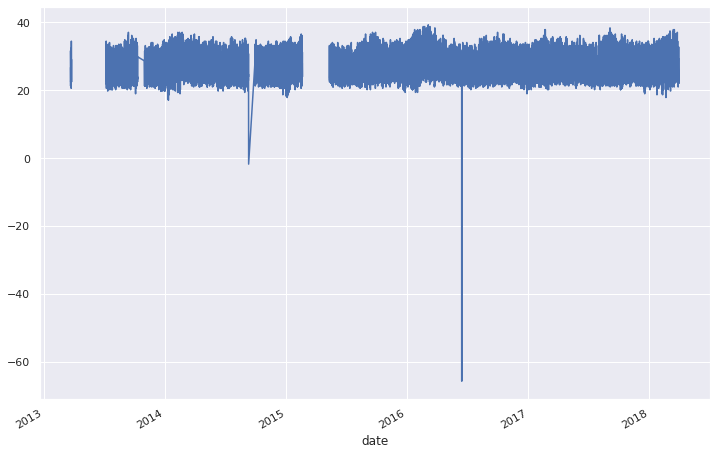

In [ ]:
clima['Temperatura'].plot(figsize=(12,8))
plt.show()

Note la falta de datos y los claros *outliers* en la gráfica. Exploremos los datos para ver cuántos datos y cuáles son inconsistentes.

In [ ]:
clima.groupby(clima.index.year)['Temperatura'].count()

date
2013     7688
2014    16599
2015    13642
2016    17557
2017    17526
2018     4308
Name: Temperatura, dtype: int64

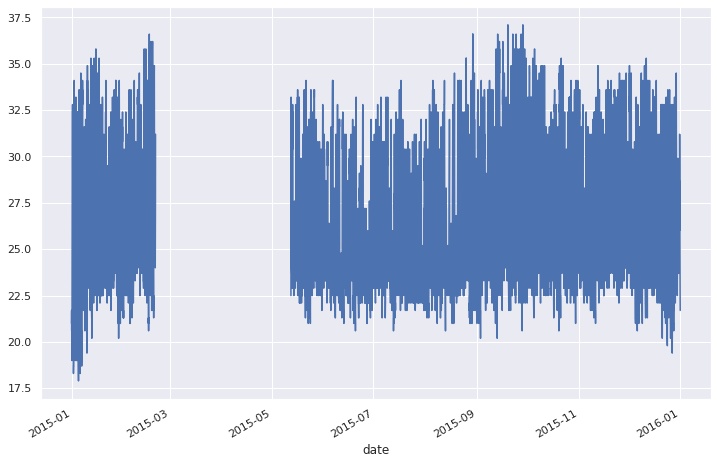

In [ ]:
clima['2015']['Temperatura'].plot()
plt.show()

In [ ]:
clima['2015-02-24':'2015-5']

,Temperatura,Rainfall (mm)
date,,
2015-03-01 09:13:00,NaN,NaN
2015-04-01 09:13:00,NaN,NaN
2015-05-12 13:29:00,22.5,0.0
2015-05-12 13:59:00,33.2,4.6
2015-05-12 14:29:00,32.8,0.0
...,...,...
2015-05-31 21:56:00,24.0,0.0
2015-05-31 22:26:00,24.0,0.0
2015-05-31 22:56:00,24.0,0.0


Sobre las mediciones inconsistentes. podríamos agrupar por temperatura los datos y contar cuántas mediciones por cada una de ellas.

In [ ]:
print(clima.groupby('Temperatura')['Rainfall (mm)'].count().head(20))

Temperatura
-65.5    17
-1.7      1
-1.3      1
-0.8      1
 1.4      1
 2.3      1
 3.2      1
 3.6      1
 5.3      1
 8.2      1
 9.4      1
 11.3     1
 14.4     1
 15.6     1
 17.1     1
 17.5     4
 17.9     5
 18.3    16
 18.7    32
 19.0    38
Name: Rainfall (mm), dtype: int64


Podemos ver qué días aparecen con la temperatura más baja

In [ ]:
min = clima['Temperatura'].min()
clima[clima['Temperatura']==min]

,Temperatura,Rainfall (mm)
date,,
2016-06-14 09:03:00,-65.5,0.0
2016-06-14 23:03:00,-65.5,0.0
2016-06-14 23:33:00,-65.5,0.0
2016-06-15 00:03:00,-65.5,0.0
2016-06-15 00:33:00,-65.5,0.0
2016-06-15 01:03:00,-65.5,0.0
2016-06-15 01:33:00,-65.5,0.0
2016-06-15 02:03:00,-65.5,0.0
2016-06-15 02:33:00,-65.5,0.0


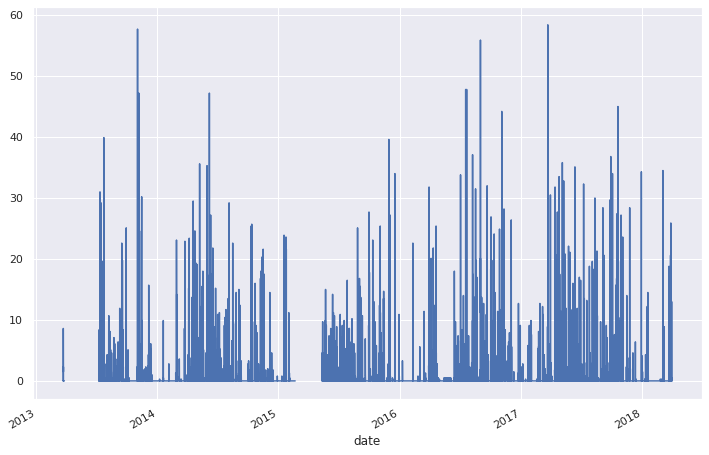

In [ ]:
clima['Rainfall (mm)'].plot()
plt.show()

**¿Cuál es el mes más caliente según nuestros datos?**

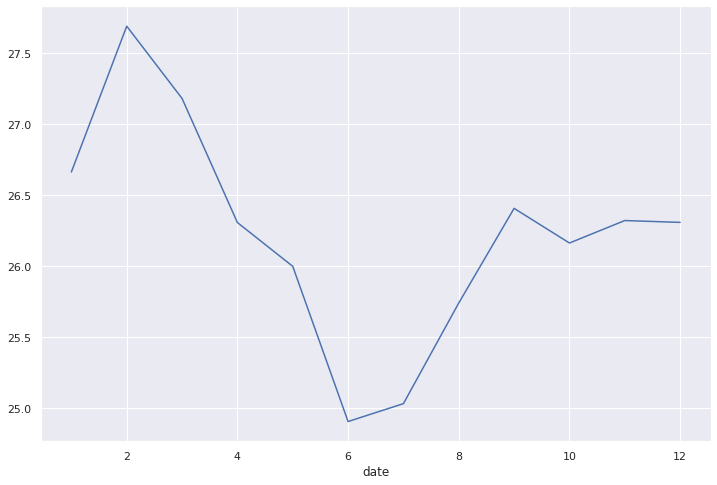

In [ ]:
clima.groupby(clima.index.month)['Temperatura'].mean().plot()
plt.show()

**¿Cuál será el mes mas lluvioso?**

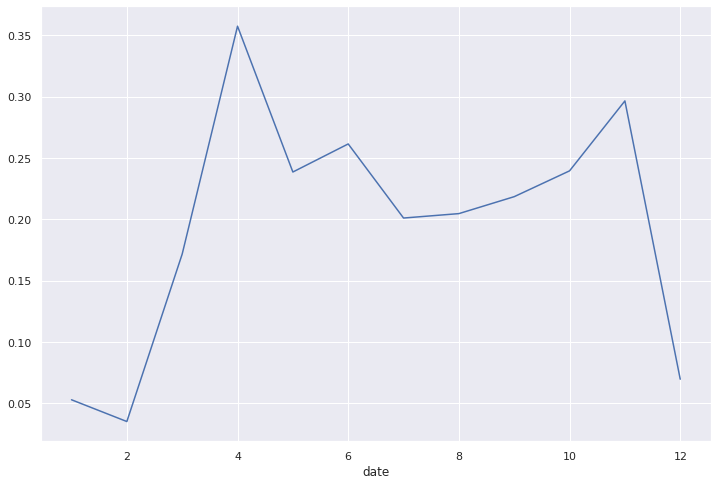

In [ ]:
## Completar el código para determinar (en promedio) mes mas lluvioso
clima.groupby(clima.index.month)['Rainfall (mm)'].mean().plot()
plt.show()

"....

Y hay días en que somos tan fértiles, tan fértiles,

como en abril el campo, que tiembla de pasión:

bajo el influjo próvido de espirituales lluvias,

el alma está brotando florestas de ilusión.
..... "

[*Canción de la vida profunda, Porfirio Barba Jacob*](https://www.poemas-del-alma.com/porfirio-barba-jacob-cancion-de-la-vida-profunda.htm)



**¿Cual es la hora del día más caliente?**


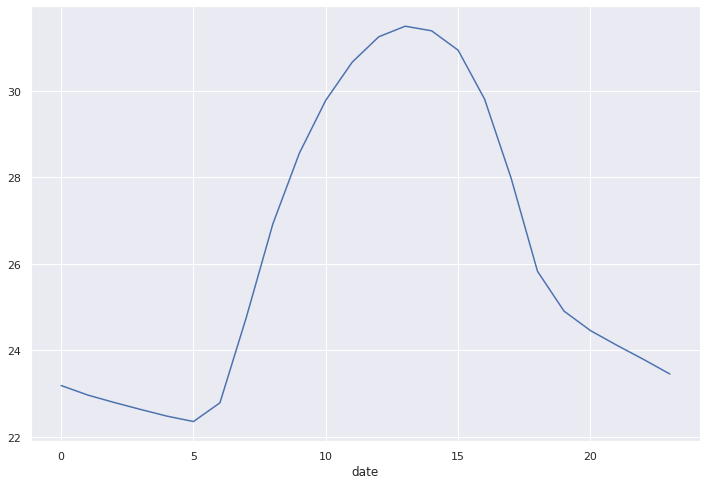

In [ ]:
clima.groupby(clima.index.hour)['Temperatura'].mean().plot(figsize=(12,8))
plt.show()

**ejercicio: determinar cuál es el día del mes más lluvioso**


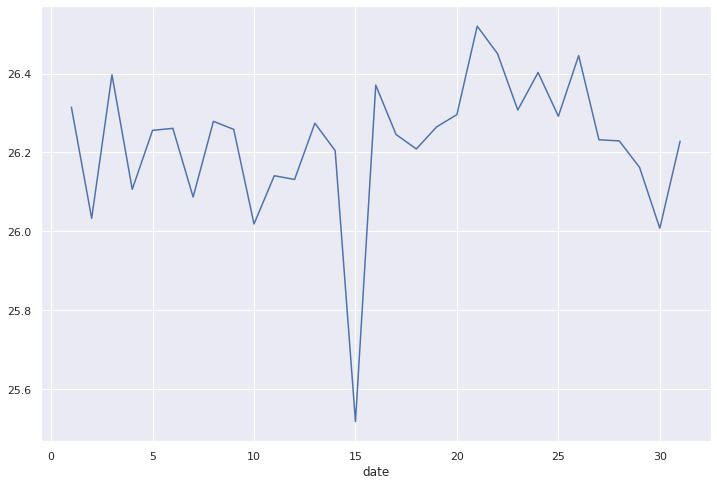

In [ ]:
clima.groupby(clima.index.day)['Temperatura'].mean().plot()
plt.show()

In [ ]:
clima.corr()

,Temperatura,Rainfall (mm)
Temperatura,1.000000,-0.100196
Rainfall (mm),-0.100196,1.000000
